<h1 style="text-align: center;">Agharini Linda Ariyani (10321024)</br>Linear Regression with emcee</br>Topik dalam Astrofisika Komputasional</h1>

# Import necessary libraries

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import emcee

# Generate Random Data

In [16]:
np.random.seed(0)
x = np.linspace(0, 10, 100)
y_true = 3 * x + 2
y_err = 1.5  # Standard deviation of noise
y_obs = np.random.normal(y_true, y_err)

# Define Likelihood, Prior, and Posterior

In [17]:
# Likelihood
def ln_likelihood(theta, x, y_obs, y_err):
    m, b = theta
    y_model = m * x + b
    ln_likelihood = -0.5 * np.sum(((y_model - y_obs) / y_err) ** 2)
    return ln_likelihood

# Prior
def ln_prior(theta):
    m, b = theta
    # Flat prior within reasonable bounds
    if 0 < m < 10 and 0 < b < 10:
        return 0.0
    return -np.inf

# Posterior
def ln_posterior(theta, x, y_obs, y_err):
    ln_prior_val = ln_prior(theta)
    if not np.isfinite(ln_prior_val):
        return -np.inf
    return ln_prior_val + ln_likelihood(theta, x, y_obs, y_err)

# MCMC

In [18]:
# Initialize walkers
nwalkers = 100  # number of mcmc walkers
ndim = 2  # number of parameters in the model
initial_guess = [1, 1]  # initial guess for slope and intercept
pos = initial_guess + 1e-4 * np.random.randn(nwalkers, ndim)

# Set up the sampler
sampler = emcee.EnsembleSampler(nwalkers, ndim, ln_posterior, args=(x, y_obs, y_err))

# Run the MCMC sampler
nsteps = 5000
sampler.run_mcmc(pos, nsteps, progress=True);

100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:08<00:00, 622.41it/s]


# Plot the Result

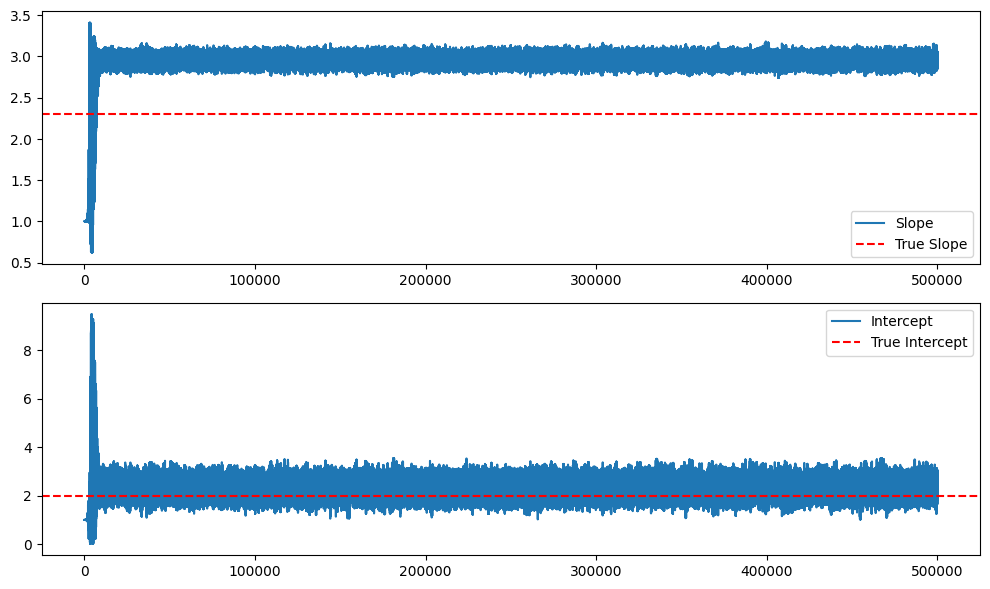

In [19]:
# Flatten the chain
samples = sampler.get_chain(flat=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(samples[:, 0], label='Slope')
plt.axhline(y_true[1], color='r', linestyle='--', label='True Slope')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(samples[:, 1], label='Intercept')
plt.axhline(y_true[0], color='r', linestyle='--', label='True Intercept')
plt.legend()
plt.tight_layout()
plt.show()

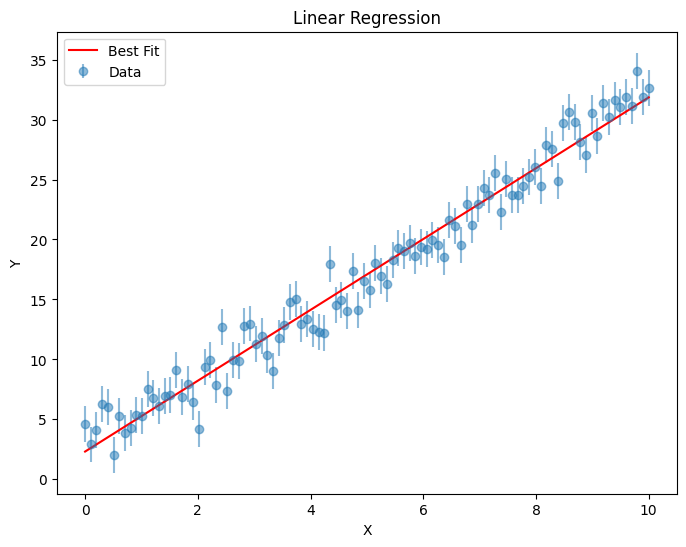

In [20]:
# Extract samples from the MCMC chain
slope_samples = sampler.chain[:, :, 0].flatten()
intercept_samples = sampler.chain[:, :, 1].flatten()

# Compute the best-fit line using the median of the samples
best_slope = np.median(slope_samples)
best_intercept = np.median(intercept_samples)
best_fit_line = best_slope * x + best_intercept

# Plot the best fit line
plt.figure(figsize=(8, 6))
plt.errorbar(x, y_obs, yerr=y_err, fmt='o', label='Data', alpha=0.5)
plt.plot(x, best_fit_line, color='red', label='Best Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Linear Regression')
plt.show()